# Naomi Nayman, Jack Herberger, Tyler Baxter

###Assignment: Analyzing Book Genres and Themes through Clustering

Full Credit: 20 points

You can either work independently or in a group of three. Should you choose to work in a group, you MUST mention the group member names. You can only work in groups of three ie each group should have only 3 members.

#### **Objective:**
The goal of this assignment is to utilize clustering techniques on a dataset of book descriptions to achieve the following:

1. **Discover Common Themes:**
   - Identify prevalent themes within clusters of books.
2. **Assign Genres to Authors:**
   - Group books into clusters and determine the genre for each author based on their cluster membership.

#### **Functionality Requirements:**
Your program should:
- Display the genre associated with a given author. (**10 points**)
- Identify and display the common themes of a specific author’s works. (**5 points**)
- Visualize using a Word cloud (**5 points**)
---

#### **Dataset:**
Use the `cleaned_books.csv` dataset that can be downloaded that includes book descriptions and author details.

---

#### **Tasks:**

1. **Data Preprocessing:**
   - Load the dataset into a Pandas DataFrame.
   - Clean the book descriptions by removing stop words and performing additional necessary preprocessing steps.

2. **Clustering:**
   - Generate TF-IDF vectors from the book descriptions using `TfidfVectorizer`.
   - Identify the optimal number of clusters (`k`) using a suitable method (e.g., the Elbow Method).
   - Choose a clustering algorithm (e.g., K-Means, DBSCAN) and justify your choice.
   - Perform clustering to group books into clusters and assign a cluster label to each book in the DataFrame.

3. **Genre Assignment:**
   - Group books by author and cluster labels.
   - Assign the most frequent cluster associated with each author as their genre.
   - Create a data structure (e.g., a Pandas Series) to store the mapping of authors to their assigned genres.

4. **Theme Identification:**
   - Develop a function to extract the main themes of a cluster using the top `N` terms from the TF-IDF matrix.
   - Apply this function to all clusters to identify and interpret the predominant themes.
   - Visualize using a Word cloud



---
```
Use CAses: (the below use case is with K Means clustering. You can get different cluster number and different words under themes depending on your implementation. Moreover, you can apply DBScan as well.)

Enter an author name: Stephen King
The genre of Stephen King is: Cluster 1

Common themes for Stephen King: 'concis' 'hemingway' 'autobiograph' ... 'power' 'one' 'world'

```

Use the following helper code to download the dataset

In [2]:
import pandas as pd

In [3]:
import io
import requests
import zipfile

# Download the zip file from the raw URL
url = "https://github.com/sumonacalpoly/Datasets/raw/main/cleaned_books.csv.zip"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Extract the CSV data from the zip file
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    with zf.open('cleaned_books.csv') as f:
        cleaned_books = pd.read_csv(f)


## 1. Data Preprocessing

### Load the dataset into a Pandas DataFrame

In [4]:
df = cleaned_books.copy()

In [5]:
df.head()

,title,author,description
0,The Hunger Games,Suzanne Collins,winning will make you famous. losing means cer...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,there is a door at the end of a silent corrido...
2,To Kill a Mockingbird,Harper Lee,the unforgettable novel of a childhood in a sl...
3,Twilight,Stephenie Meyer,about three things i was absolutely positive.f...
4,The Book Thief,Markus Zusak,trying to make sense of the horrors of world w...


### Clean the book descriptions by removing stop words and performing additional necessary preprocessing steps.

In [6]:
%pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/naominayman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naominayman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naominayman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#remove punctuation
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits
    text = ''.join([char for char in text if not char.isdigit()])
    # Remove punctuation and replace with a space
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df['cleaned_description'] = df['description'].apply(preprocess)

df['cleaned_description'][0]

'winning will make you famous losing means certain death the nation of panem formed from a post apocalyptic north america is a country that consists of a wealthy capitol region surrounded by poorer districts early in its history a rebellion led by a th district against the capitol resulted in its destruction and the creation of an annual televised event known as the hunger games in punishment and as a reminder of the power and grace of the capitol each district must yield one boy and one girl between the ages of and through a lottery system to participate in the games the tributes are chosen during the annual reaping and are forced to fight to the death leaving only one survivor to claim victory when year old katniss s young sister prim is selected as district s female representative katniss volunteers to take her place she and her male counterpart peeta are pitted against bigger stronger representatives some of whom have trained for this their whole lives she sees it as a death senten

In [9]:
df['cleaned_description'][1]

'there is a door at the end of a silent corridor and it’s haunting harry pottter’s dreams why else would he be waking in the middle of the night screaming in terror harry has a lot on his mind for this his fifth year at hogwarts a defense against the dark arts teacher with a personality like poisoned honey a big surprise on the gryffindor quidditch team and the looming terror of the ordinary wizarding level exams but all these things pale next to the growing threat of he who must not be named a threat that neither the magical government nor the authorities at hogwarts can stop as the grasp of darkness tightens harry must discover the true depth and strength of his friends the importance of boundless loyalty and the shocking price of unbearable sacrifice his fate depends on them alll back cover'

In [10]:
# remove stopwords
allstopwords = stopwords.words('english')

df['cleaned_description'] = df['cleaned_description'].apply(lambda x: " ".join(i for i in x.lower().split() if i not in allstopwords))

In [11]:
df['cleaned_description'][0]

'winning make famous losing means certain death nation panem formed post apocalyptic north america country consists wealthy capitol region surrounded poorer districts early history rebellion led th district capitol resulted destruction creation annual televised event known hunger games punishment reminder power grace capitol district must yield one boy one girl ages lottery system participate games tributes chosen annual reaping forced fight death leaving one survivor claim victory year old katniss young sister prim selected district female representative katniss volunteers take place male counterpart peeta pitted bigger stronger representatives trained whole lives sees death sentence katniss close death survival second nature'

In [22]:
df.head()

,title,author,description,cleaned_description
0,The Hunger Games,Suzanne Collins,winning will make you famous. losing means cer...,winning make famous losing means certain death...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,there is a door at the end of a silent corrido...,door end silent corridor it’s haunting harry p...
2,To Kill a Mockingbird,Harper Lee,the unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...
3,Twilight,Stephenie Meyer,about three things i was absolutely positive.f...,three things absolutely positive first edward ...
4,The Book Thief,Markus Zusak,trying to make sense of the horrors of world w...,trying make sense horrors world war ii death r...


## 2. Clustering

### Generate TF-IDF vectors from the book descriptions using `TfidfVectorizer`.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_description'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


,aa,aaa,aaaanah,aaarr,aachan,aachen,aachim,aack,aaden,aadh,...,ﬁction,ﬁerce,ﬁnd,ﬁred,ﬁrst,ﬂame,ﬂavorful,ﬂavors,ﬂed,ﬂoors
38160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


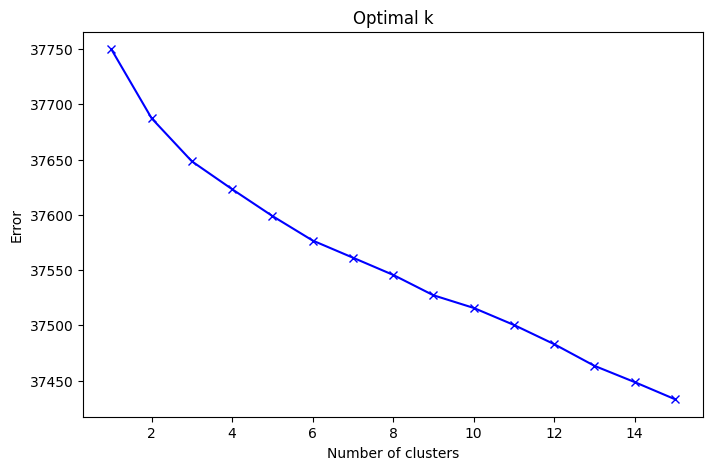

In [19]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

errors = []
K = range(1, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    errors.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, errors, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.title('Optimal k')
plt.show()

from the graph above, it looks like k=3 is optimal usiing the elbow method. But, for this particular graph it may not be the best idea to set k manually since there isn't a very obvious elbow. That being said, we will use DBSCAN for clustering rather than KMeans.